In [1]:
import matplotlib.pyplot as plt
import numpy as np

from draw_roulette import draw_roulette

In [2]:
# Cover
d = draw_roulette([11], (24, 3), margin=0.05, phase=30, h_phase=10, random_seed=0)
d.setPixelScale(1200)
d.savePng('cover.png')
# Américaine
d = draw_roulette([0], americaine=True, phase=0, h_phase=20)
d.setPixelScale(600)
d.savePng('americaine.png')
# Européenne
d = draw_roulette([0], phase=0, h_phase=45)
d.setPixelScale(600)
d.savePng('europeenne.png')


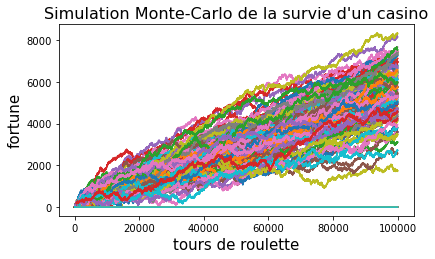

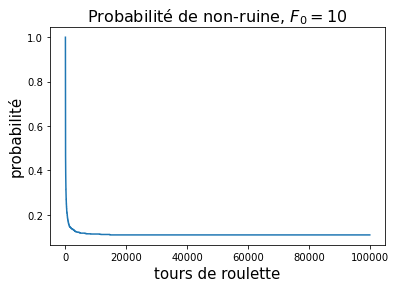

In [3]:
# Configuration Roulette américaine
z = 2  # Nombre de zéros
n = 36  # Nombre de numéros (zéros exclus)
M = 1  # Nombre de trajectoires    
N = 100  # Nombre de tours de roulette
n_d = {1: 38, 2: 61, 3: 26, 4: 24, 6: 22, 12: 6, 18: 6}

i = np.array(list(n_d.keys()))
f = np.zeros(n - 1)
f[36 // i - 2] = np.array(list(n_d.values()))
f /= np.sum(f)
p = lambda d: n / (n + z) / (d + 1)
fp = f * p(np.arange(1, n))
p_g = 1 - np.sum(fp)


def show_phi(u0, fName='mc'):
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append((p_g, 0), fp))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    plt.figure(figsize=(6, 6/1.618))
    plt.title("Simulation de la survie d'un casino", fontsize=16)
    plt.xlabel("tours de roulette", fontsize=15)
    plt.ylabel("fortune", fontsize=15)
    # plt.plot(u.T, c='gray')
    plt.plot(u_cutted.T)
    plt.tight_layout()
    plt.savefig(f'monte-carlo/{fName}.png', transparent=True)
    # plt.show()
    plt.close()

s = 1
np.random.seed(s)
show_phi(10, str(M) + '_' + str(N) + '_' + str(s))
s = 5
np.random.seed(s)
show_phi(10, str(M) + '_' + str(N) + '_' + str(s))

M = 1000
N = 100000

def show_phi(u0, fName='mc'):
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append((p_g, 0), fp))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    plt.figure(figsize=(6, 6/1.618))
    plt.title("Simulation Monte-Carlo de la survie d'un casino", fontsize=16)
    plt.xlabel("tours de roulette", fontsize=15)
    plt.ylabel("fortune", fontsize=15)
    # plt.plot(u.T, c='gray')
    plt.plot(u_cutted.T)
    plt.tight_layout()
    plt.savefig(f'monte-carlo/path_{fName}.png', transparent=True)
    plt.show()
    plt.close()
    plt.title(f"Probabilité de non-ruine, $F_{{0}} = {u0}$", fontsize=16)
    plt.xlabel("tours de roulette", fontsize=15)
    plt.ylabel("probabilité", fontsize=15)
    plt.plot(phi)
    plt.savefig(f'monte-carlo/prob_{fName}.png', transparent=True)
    plt.show()
    plt.close()
    return phi[-1]

s = 1
np.random.seed(s)
phi1 = show_phi(10, str(M) + '_' + str(N) + '_' + str(s))

In [4]:
phi1

0.109

In [5]:
# Américaine
d = draw_roulette(list(np.random.randint(-1, 37, 100)), americaine=True, phase=66, h_phase=-29)
d.setPixelScale(1200)
d.savePng('monte-carlo/roulette_100.png')